In [ ]:
''' Description: This program uses an artificial Recurrent Reural Retwork (RNN)
    called Long Short Term Memory (LSTM) to predict the closing stock price of a
    corporation using the past days_for_predict days stock price. '''

# Import the libraries
import datetime as dt
import pandas as pd
import pandas_datareader as web
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from google.colab import files

# https://matplotlib.org/3.2.1/gallery/style_sheets/fivethirtyeight.html
plt.style.use('fivethirtyeight')

# Define variables
stock_code = 'QQQ'
#stock_code = 'TQQQ'
data_source = 'yahoo'

start_date = dt.date.today() - dt.timedelta(days=3650)
end_date = dt.date.today()
print("Today:", dt.date.today(), "  Start_date:", start_date, " End_date:", end_date)

training_test_ratio = .9
days_for_predict = 50

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Today: 2020-05-04   Start_date: 2010-05-07  End_date: 2020-05-04


In [ ]:
def visualize_price_history(OHLC):# Visualize the price history
  plt.figure(figsize=(16,8))
  plt.title(stock_code + ' ' + OHLC + ' Price History')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('USD ($)', fontsize=18)
  plt.plot(df[OHLC])
  plt.show()

def visualize_prediction():# Visualize the predictions
  train = close_data[:training_data_len]
  valid = close_data[training_data_len:]
  valid['Predictions'] = predictions

  plt.figure(figsize=(16,8))
  plt.title(stock_code + ' Close Price w/ predictions')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
  plt.show()


In [ ]:
# Get the stock quote
df = web.DataReader(stock_code,
                    data_source=data_source,
                    start=start_date,
                    end=end_date)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-05-07,46.799999,44.279999,46.220001,45.410000,288200400.0,40.854549
2010-05-10,47.799999,47.310001,47.430000,47.770000,136041600.0,42.977798
2010-05-11,48.389999,47.200001,47.290001,47.720001,113016100.0,42.932812
2010-05-12,48.660000,47.900002,47.980000,48.619999,85462400.0,43.742535
2010-05-13,48.790001,47.730000,48.410000,47.849998,102844300.0,43.049782
...,...,...,...,...,...,...
2020-04-27,216.630005,214.500000,216.190002,215.559998,36451700.0,215.559998
2020-04-28,217.320007,211.210007,217.320007,211.500000,46862800.0,211.500000
2020-04-29,219.970001,215.139999,216.190002,219.000000,48716400.0,219.000000


In [ ]:
# Create a new dataframe with only the Close column
close_data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = close_data.values
print("type(dataset):", type(dataset), "dataset.shape:", dataset.shape)

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * training_test_ratio)
print("type(training_data_len):", type(training_data_len), "training_data_len:", training_data_len)

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print("type(scaled_data.shape):", type(scaled_data.shape), "scaled_data.shape:", scaled_data.shape)

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
print("type(train_data.shape):", type(train_data.shape), "train_data.shape:", train_data.shape)

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(days_for_predict, len(train_data)):
  # Append the data of train_data from Day 0 to (days_for_predict - 1) into x_train
  x_train.append(train_data[i-days_for_predict:i, 0])

  # Append the data of train_data in days_for_predict into y_train only
  y_train.append(train_data[i, 0])

  # Print x_train & y_train
  if i <= days_for_predict:
    print('x_train:', x_train)
    print('y_train:', y_train)

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("type(x_train.shape):", type(x_train.shape), "x_train.shape:" , x_train.shape)
print("type(y_train.shape):", type(y_train.shape), "y_train.shape:" , y_train.shape)

type(dataset): <class 'numpy.ndarray'> dataset.shape: (2514, 1)
type(training_data_len): <class 'int'> training_data_len: 2263
type(scaled_data.shape): <class 'tuple'> scaled_data.shape: (2514, 1)
type(train_data.shape): <class 'tuple'> train_data.shape: (2263, 1)
x_train: [array([0.0151149 , 0.02724795, 0.0269909 , 0.0316179 , 0.02765923,
       0.02292941, 0.02370058, 0.02035885, 0.01845664, 0.0096653 ,
       0.01218446, 0.01125905, 0.0114647 , 0.00889414, 0.01747981,
       0.0160917 , 0.01393244, 0.01943344, 0.02169553, 0.01346974,
       0.00925402, 0.00884272, 0.00694051, 0.01336691, 0.0155776 ,
       0.0155262 , 0.02179835, 0.02277518, 0.02354634, 0.02328929,
       0.02123283, 0.01938204, 0.01840521, 0.01480642, 0.01439514,
       0.01357256, 0.004627  , 0.00123386, 0.00061693, 0.        ,
       0.00066833, 0.00766026, 0.00889414, 0.0110534 , 0.01172176,
       0.01470362, 0.01588607, 0.0160917 , 0.0096139 , 0.01156753])]
y_train: [0.014343721040679075]
type(x_train.shape): 

In [ ]:
# Build the LSTM modol
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2213/2213 [==============================] - 41s 19ms/step - loss: 8.2264e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - days_for_predict:, :]

# Create the data sets x_test and y_test
x_test = []
for i in range(days_for_predict, len(test_data)):
  x_test.append(test_data[i-days_for_predict:i, 0])

y_test = dataset[training_data_len:, :]
  
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


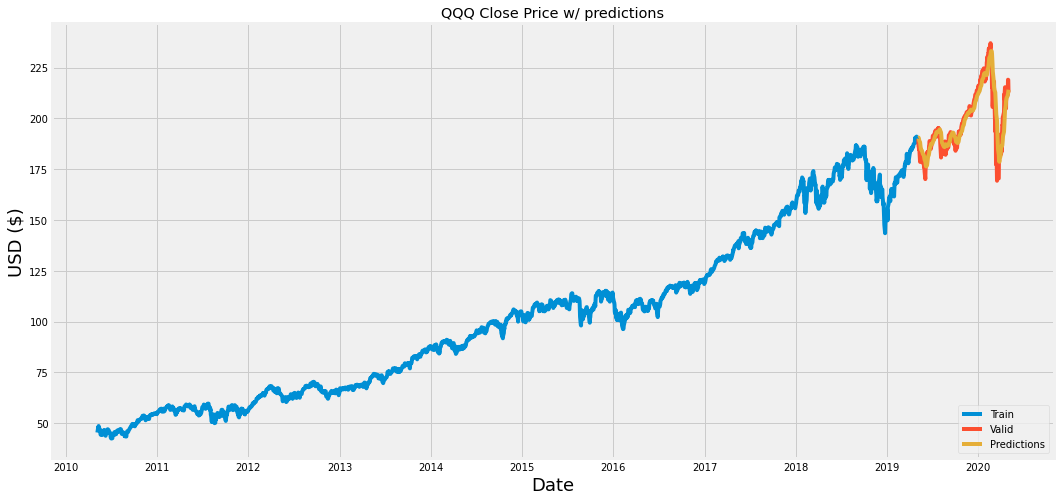

Root Mean Squared Error: 5.833549790358639
Profit(%) of strategy 0: 13.734296724014317 %
Profit(%) of strategy 1: 17.97848210287143 %


,High,Low,Open,Close,Predict.,Diff.,Cond.(1),Profit(1),Change(1)
Date,,,,,,,,,
2019-05-06,190.199997,186.759995,187.050003,189.940002,190.466766,0.526764,Sell@Close,2.889999,1.015450
2019-05-07,188.669998,184.509995,187.869995,186.240005,190.531494,4.291489,Sell@Close,-1.629990,0.991324
2019-05-08,187.169998,184.960007,185.630005,185.770004,190.197296,4.427292,Sell@Close,0.139999,1.000754
2019-05-09,185.410004,182.089996,183.699997,184.770004,189.654648,4.884644,Sell@Close,1.070007,1.005825
2019-05-10,185.889999,181.029999,184.110001,185.000000,188.949905,3.949905,Sell@Close,0.889999,1.004834
...,...,...,...,...,...,...,...,...,...
2020-04-27,216.630005,214.500000,216.190002,215.559998,210.873505,-4.686493,No action,0.000000,1.000000
2020-04-28,217.320007,211.210007,217.320007,211.500000,211.674423,0.174423,No action,0.000000,1.000000
2020-04-29,219.970001,215.139999,216.190002,219.000000,212.067490,-6.932510,No action,0.000000,1.000000


In [ ]:
# visualize_price_history('High')
# visualize_price_history('Low')
# visualize_price_history('Open')
# visualize_price_history('Close')

visualize_prediction()

print('Root Mean Squared Error:', np.sqrt(np.mean(((predictions- y_test) ** 2))))

df2 = df[training_data_len:]
df2 = df2.drop(['Adj Close', 'Volume'], axis=1)

df2['Predict.'] = predictions
df2['Diff.'] = df2['Predict.'] - df2['Close']

def strategy0():
  Open_of_first_day = df2.iat[0, 2]
  Close_of_last_day = df2.iat[(len(dataset) - training_data_len - 1), 3]
  print('Profit(%) of strategy 0:', (Close_of_last_day - Open_of_first_day) / Open_of_first_day * 100, '%')


def strategy1():# Buy if Predict. price > Opening price
  
  cond1 = (df2['Predict.'] > df2['Open']) & (df2['Predict.'] <= df2['High'])
  cond2 = (df2['Predict.'] > df2['Open']) & (df2['Predict.'] > df2['High'])

  df2['Cond.(1)'] = np.where(cond1, 'Sell@Predict.', 'No action')
  df2['Profit(1)'] = np.where(cond1, (df2['Predict.'] - df2['Open']), 0)

  df2['Cond.(1)'] = np.where(cond2, 'Sell@Close', df2['Cond.(1)'])
  df2['Profit(1)'] = np.where(cond2, (df2['Close'] - df2['Open']), df2['Profit(1)'])

  df2['Change(1)'] = (df2['Profit(1)'] + df2['Open']) / df2['Open']

  print('Profit(%) of strategy 1:', (df2['Change(1)'].product() - 1) * 100, '%')
  # print('Profit(%) of strategy 1 ver.2:', (df2['Change(1)'] - 1).sum() * 100, '%')


strategy0()

strategy1()

df2

# df2.to_excel('df2.xlsx')
# files.download('df2.xlsx')